In [1]:
import detector
import importlib
import data_loader
import pandas as pd
import unet_detector
import seaborn as sn
import xception_freq_detector
import vanilla_pytorch_detector
import matplotlib.pyplot as plt

importlib.reload(detector)
importlib.reload(unet_detector)
importlib.reload(xception_freq_detector)
importlib.reload(vanilla_pytorch_detector)
importlib.reload(data_loader)

%matplotlib inline

In [ ]:
detector_class = unet_detector.UNetFreqDetector
#detector_class = unet_detector.UNetSpatialDetector
#detector_class = xception_freq_detector.XceptionFreqDetector

fake_detector = detector_class()

In [3]:
dataset_loader = data_loader.CarDamageDatasetLoader()

train_ds, eval_ds, train_df, eval_df = dataset_loader.load_dataset()
print("Training Dataset Length: " + str(len(train_df)))
print("Evaluation Dataset Length: " + str(len(eval_df)))
print("\nSample Training Dataset:")
display(train_df[:2])

Training Dataset Length: 180
Evaluation Dataset Length: 20

Sample Training Dataset:


,id,image,label
0,/Users/akash/Code/car_images/dataset/fake/niss...,<PIL.Image.Image image mode=RGB size=224x224 a...,Fake
1,/Users/akash/Code/car_images/dataset/fake/ford...,<PIL.Image.Image image mode=RGB size=224x224 a...,Fake


Fake samples


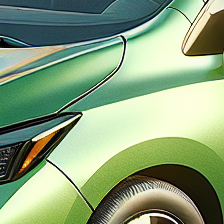

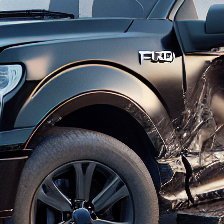

In [4]:
print("Fake samples")
for image in train_df[( train_df["label"] == "Fake")].iloc[:min(2, len(train_df))]["image"]:
    display(image)

Real samples


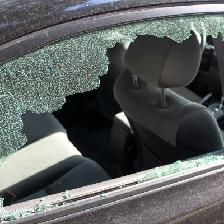

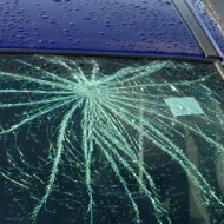

In [5]:
print("Real samples")
for image in train_df[( train_df["label"] == "Real")].iloc[:min(2, len(train_df))]["image"]:
    display(image)

In [6]:
model = fake_detector.get_model()
model

TwoStreamUNetClassifier(
  (spatial_stream): UNet(
    (enc1): UNetBlock(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (enc2): UNetBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (enc3): UNetBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

In [7]:
epochs = 10
batch_size = 16

fake_detector.train_model(train_ds, eval_ds, epochs, batch_size)
checkpoint_filename = f"{fake_detector.__class__.__name__}_epoch_{epochs}.pth"

print(f"\nModel trained for {str(epochs)} epochs, best epoch: {epochs}")

Using device: mps


Epoch 1/10 (Eval):   0%|          | 0/2 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 1/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]



Epoch 1/10 Summary:
Train Loss: 0.5182
Eval Loss: 0.9860
Train Metrics: {'accuracy': np.float64(0.734375), 'precision': np.float64(0.8001869513588264), 'recall': np.float64(0.734375), 'bad_predictions': np.float64(4.25)}
Eval Metrics: {'accuracy': np.float64(0.6875), 'precision': np.float64(0.5703125), 'recall': np.float64(0.6875), 'bad_predictions': np.float64(5.0)}


Epoch 2/10 (Eval):   0%|          | 0/2 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 2/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]



Epoch 2/10 Summary:
Train Loss: 0.3607
Eval Loss: 1.4652
Train Metrics: {'accuracy': np.float64(0.8177083333333334), 'precision': np.float64(0.8601000706469456), 'recall': np.float64(0.8177083333333334), 'bad_predictions': np.float64(2.6666666666666665)}
Eval Metrics: {'accuracy': np.float64(0.6875), 'precision': np.float64(0.5703125), 'recall': np.float64(0.6875), 'bad_predictions': np.float64(5.0)}


Epoch 3/10 (Eval): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]



Epoch 3/10 Summary:
Train Loss: 0.2675
Eval Loss: 0.2453
Train Metrics: {'accuracy': np.float64(0.859375), 'precision': np.float64(0.9203662367724869), 'recall': np.float64(0.859375), 'bad_predictions': np.float64(1.75)}
Eval Metrics: {'accuracy': np.float64(0.875), 'precision': np.float64(0.890625), 'recall': np.float64(0.875), 'bad_predictions': np.float64(2.0)}


Epoch 4/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]



Epoch 4/10 Summary:
Train Loss: 0.1698
Eval Loss: 0.2276
Train Metrics: {'accuracy': np.float64(0.9479166666666666), 'precision': np.float64(0.9557601686507938), 'recall': np.float64(0.9479166666666666), 'bad_predictions': np.float64(0.8333333333333334)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.953125), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}


Epoch 5/10 (Eval):  50%|█████     | 1/2 [00:00<00:00,  2.15it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 5/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]



Epoch 5/10 Summary:
Train Loss: 0.1412
Eval Loss: 1.0957
Train Metrics: {'accuracy': np.float64(0.9322916666666666), 'precision': np.float64(0.9513372189153438), 'recall': np.float64(0.9322916666666666), 'bad_predictions': np.float64(0.8333333333333334)}
Eval Metrics: {'accuracy': np.float64(0.78125), 'precision': np.float64(0.9056818181818183), 'recall': np.float64(0.78125), 'bad_predictions': np.float64(2.0)}


Epoch 6/10 (Eval):  50%|█████     | 1/2 [00:00<00:00,  2.32it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 6/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]



Epoch 6/10 Summary:
Train Loss: 0.2448
Eval Loss: 1.2275
Train Metrics: {'accuracy': np.float64(0.90625), 'precision': np.float64(0.9412409060846562), 'recall': np.float64(0.90625), 'bad_predictions': np.float64(1.5)}
Eval Metrics: {'accuracy': np.float64(0.65625), 'precision': np.float64(0.9278846153846154), 'recall': np.float64(0.65625), 'bad_predictions': np.float64(2.5)}


Epoch 7/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]



Epoch 7/10 Summary:
Train Loss: 0.0919
Eval Loss: 0.1628
Train Metrics: {'accuracy': np.float64(0.9739583333333334), 'precision': np.float64(0.978515625), 'recall': np.float64(0.9739583333333334), 'bad_predictions': np.float64(0.4166666666666667)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.953125), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}


Epoch 8/10 (Train):  92%|█████████▏| 11/12 [00:17<00:01,  1.59s/it, loss=0.0747, accuracy=1.0000]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 8/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]



Epoch 8/10 Summary:
Train Loss: 0.1151
Eval Loss: 0.0718
Train Metrics: {'accuracy': np.float64(0.9583333333333334), 'precision': np.float64(0.9849454365079365), 'recall': np.float64(0.9583333333333334), 'bad_predictions': np.float64(0.4166666666666667)}
Eval Metrics: {'accuracy': np.float64(0.96875), 'precision': np.float64(0.9732142857142857), 'recall': np.float64(0.96875), 'bad_predictions': np.float64(0.5)}


Epoch 9/10 (Eval):  50%|█████     | 1/2 [00:00<00:00,  2.54it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 9/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]



Epoch 9/10 Summary:
Train Loss: 0.1718
Eval Loss: 7.2207
Train Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(0.9513165509259259), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}
Eval Metrics: {'accuracy': np.float64(0.40625), 'precision': np.float64(0.4278846153846154), 'recall': np.float64(0.40625), 'bad_predictions': np.float64(3.5)}


Epoch 10/10 (Eval): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]


Epoch 10/10 Summary:
Train Loss: 0.1038
Eval Loss: 0.2828
Train Metrics: {'accuracy': np.float64(0.9427083333333334), 'precision': np.float64(0.9585792824074074), 'recall': np.float64(0.9427083333333334), 'bad_predictions': np.float64(0.6666666666666666)}
Eval Metrics: {'accuracy': np.float64(0.90625), 'precision': np.float64(0.9375), 'recall': np.float64(0.90625), 'bad_predictions': np.float64(1.5)}

Model trained for 10 epochs, best epoch: 10


In [8]:
fake_detector.save_checkpoint(checkpoint_filename)
print(f"Saved model to {checkpoint_filename}")

Checkpoint saved to checkpoints/UNetFreqDetector_epoch_10.pth
Saved model to UNetFreqDetector_epoch_10.pth


In [9]:
eval_detector = detector_class()
eval_detector.get_model()
eval_detector.load_checkpoint(checkpoint_filename)

Accuracy:		85.00
Bad Predictions:	0/20
{}


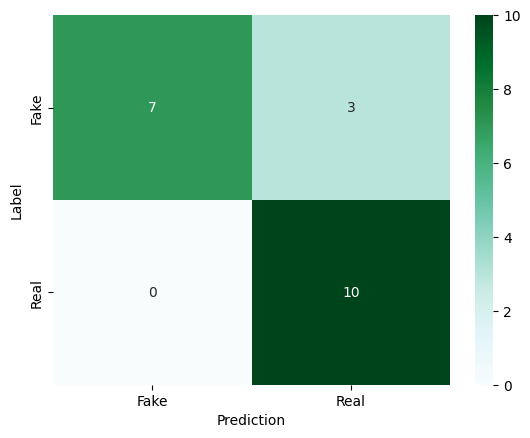

,Fake,Real
Fake,7,3
Real,0,10


,label,precision,recall
0,Fake,0.7,1.000000
1,Real,1.0,0.769231


In [10]:
y_true, y_pred, images, df_cm, df_metrics, accuracy, bad_prediction_count, bad_predictions = eval_detector.evaluate_model(eval_ds)
df_results = pd.DataFrame(zip(y_true, y_pred, images), columns=["Label", "Prediction", "Image"])

print(f"Accuracy:\t\t{accuracy:.2f}")
print(f"Bad Predictions:\t{bad_prediction_count}/{len(y_true)}")
print(bad_predictions)

plt.figure()
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()
display(df_cm)

display(df_metrics)

Found 3 samples with label 'Fake' and prediction 'Real'


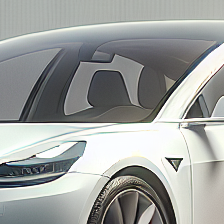

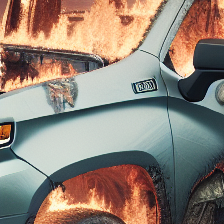

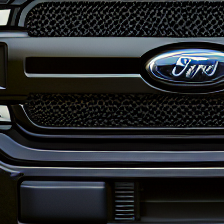

In [11]:
def display_sample_failures(df, label, prediction):
    images = df[(df["Label"] == label) & (df["Prediction"] == prediction)]["Image"]
    print(f"Found {len(images)} samples with label '{label}' and prediction '{prediction}'")

    for i in range(min(5, len(images))):
        display(images.iloc[i])


display_sample_failures(df_results, label="Fake", prediction="Real")